
# Project: Investigate a Dataset - [TMDB Movie Data] by Daniel Bright  A

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 This data contains 10866 rows and 21 columns.It is made of 4(float64),6(int64) and 11(objects).This dataset contains the features of movies such as their id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime	genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj and revenue_adj.
 id and imdb_id are unique identifiers.


### Questions for Analysis
1. Which generes are the most popular(top 3)?
2. Which genere generated more revenue?
3. Which genere has the highest budget?
4. Based on the above analysis/questions, what recommendation will you give to a start up movie firm?

> This analysis is going to start by importing the necessary libraries to ensure accurate and precised work, then read the CSV file into this notebook as shown below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tmd = pd.read_csv('tmdb-movies.csv')
#using head,describe and info,I will now view some properties of this data set
tmd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The mean of the data set for the columns in order are 66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07.
Non-Values exist in the following columns; imdb-id,cast,homepage,director,tagline,keywords,overview,genres and production companies.


In [12]:
# Upgraded pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Let's load data and print out a few lines. Perform operations to inspect data
tmd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# let's check for null/missing data and sum them.
tmd.isna()
tmd.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the above code I have seen the sum of missing data in each column and this will lead to cleaning of the data by;
1. dropping rows and columns that are not needed for this analysis
2. Filling the null values with the mean of their columns to keep our data clean and a bit accurate. 
Let's clean this below


### Data Cleaning
> Time to clean the dataset so as to ensure smooth analysis
 

In [4]:
# Let's drop some columns that are not necessary at this point.
tmd.drop(['original_title','imdb_id','vote_count','vote_average','cast','homepage','director','tagline','keywords','overview','release_year','release_date','budget_adj','revenue_adj','production_companies'],axis=1,inplace=True)
tmd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10866 non-null  int64  
 1   popularity  10866 non-null  float64
 2   budget      10866 non-null  int64  
 3   revenue     10866 non-null  int64  
 4   runtime     10866 non-null  int64  
 5   genres      10843 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 509.5+ KB


In [5]:
# Replacing all the missing values in each column with the mean to avoid skewing/deviations, we have
tmd.fillna(tmd.mean(),inplace=True)
tmd.info()
#using .info() to see the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10866 non-null  int64  
 1   popularity  10866 non-null  float64
 2   budget      10866 non-null  int64  
 3   revenue     10866 non-null  int64  
 4   runtime     10866 non-null  int64  
 5   genres      10843 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 509.5+ KB


C:\Users\mimi\AppData\Local\Temp\ipykernel_14108\944631240.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tmd.fillna(tmd.mean(),inplace=True)


In [6]:
#After the above code,there are still missing values in this dataset. So, this code below will drop all rows with missing values.
tmd.dropna(inplace=True)
#Using .info again we view the changes to confirm the drop and uniform data.
tmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10843 non-null  int64  
 1   popularity  10843 non-null  float64
 2   budget      10843 non-null  int64  
 3   revenue     10843 non-null  int64  
 4   runtime     10843 non-null  int64  
 5   genres      10843 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 593.0+ KB


In [7]:
#let's check and drop duplicates
sum(tmd.duplicated())
tmd.drop_duplicates(inplace= True)
tmd.info()
#to confirm the drop, we view again with tmd.info. Number of rows reduced from 9823 to 9822.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10842 non-null  int64  
 1   popularity  10842 non-null  float64
 2   budget      10842 non-null  int64  
 3   revenue     10842 non-null  int64  
 4   runtime     10842 non-null  int64  
 5   genres      10842 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 592.9+ KB


In [8]:
#to further view the properties of the cleansed data to ensure uniformity,we run the codes below:
tmd.nunique()

id            10842
popularity    10791
budget          557
revenue        4702
runtime         246
genres         2039
dtype: int64

The result above shows that 'id' is a unique identifier since the number of rows did not change. Let's view our dataset now to see the final look

In [9]:
# to see properties like mean,standard deviation and percentile.
tmd.describe()

,id,popularity,budget,revenue,runtime
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000


In [10]:
tmd.head()

,id,popularity,budget,revenue,runtime,genres
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller
2,262500,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller
3,140607,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000000,1506249360,137,Action|Crime|Thriller


From the above data, using the 75% to max of popularity to compare other features, it is seen that;
1. Movies with runtime 112-877,
2. Movies with bugdet from 1.9x10^7-4.25x10^8,
3. Movies that generate revenue from 3.05x10^7-2.78x10^9,are more popular.

<a id='eda'></a>
## Exploratory Data Analysis

> Time to explore our data to answer the stated questions through statistics and visualization


### Research Question 1 (Among the top five  generes,which is the most  popular?)

Let's view the properties and distribution of genres to note the top 5 genres

In [38]:
%matplotlib inline

<AxesSubplot:title={'center':'Top 5 Genres'}, ylabel='genres'>

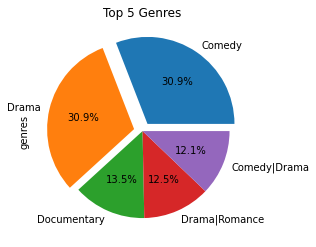

In [79]:
# to view the top 5 genres and callit new_gt, we use the code below
new_gt= tmd['genres'].value_counts().head().plot(kind='pie',autopct='%1.1f%%',title='Top 5 Genres',explode=(0.1,0.1,0,0,0));
new_gt

From the chart above,**Comedy**(30.9%) and **Drama**(30.9%) occured mostly in this dataset.
I am going to extract a new table from **tmd** containing only the top five *genres* only.

In [16]:
# Let's extract the new table and name it new_t, then view the head.
new_t=tmd[tmd['genres'].isin(['Drama','Comedy','Drama|Romance','Comedy|Drama','Comedy|Drama','Documentary'])]
new_t.head()

,id,popularity,budget,revenue,runtime,genres
23,216015,4.710402,40000000,569651467,125,Drama|Romance
24,318846,4.648046,28000000,133346506,130,Comedy|Drama
26,214756,4.564549,68000000,215863606,115,Comedy
39,167073,3.227329,11000000,62076141,111,Drama|Romance
51,257211,2.814802,35000000,194564672,121,Comedy


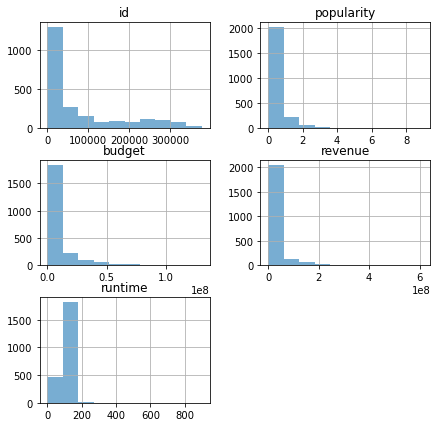

In [17]:
# A quick view of the new_t distribution
new_t.hist(figsize=(7,7),alpha=0.6);

Observation: The histograms above show the distribution on data in the analyzed columns.Popularity,budget and revenue are right skewed showing concentration of data in a particular area.

In [52]:
# the code below will group the genres and popularity to determine the most popular genres
z=new_t.groupby('genres')['popularity'].max()
z

genres
Comedy           6.668990
Comedy|Drama     4.930820
Documentary      1.005772
Drama            8.947905
Drama|Romance    4.710402
Name: popularity, dtype: float64

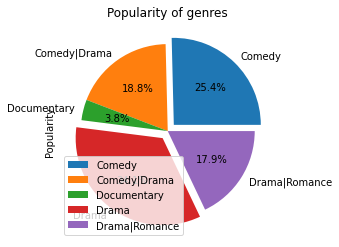

In [45]:
#let's visualize the above information in a pie chart
new_t.groupby('genres')['popularity'].max().plot(kind='pie',autopct='%1.1f%%',legend=True,explode=(0.1,0,0,0.1,0), title='Popularity of genres', label='Popularity');


Observation:From the chart we see the most popular genre based on the polurarity rating is **Drama** with 34.1% and 8.95 rating

### Research Question 2 ( Which genres among the top five generated more revenue?)

Next we are going to see which genres among the top five generated more revenue using few lines of code

In [98]:
#Let's view the maximum revenues generated
new_t.groupby('genres')['revenue'].max()

genres
Comedy           459270619
Comedy|Drama     264118201
Documentary      119114517
Drama            611899420
Drama|Romance    569651467
Name: revenue, dtype: int64

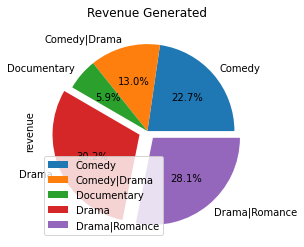

In [44]:
# Let's see what the visuals looks like
new_t.groupby('genres')['revenue'].max().plot(kind='pie',legend=True,explode=(0,0,0,0.1,0.1), title='Revenue Generated',autopct='%1.1f%%');

Observation:Drama generated more revenue(**611899420**)  with 30.2% followed closely by Drama|Romance(**569651467**) with 28.1%.

Next, let's also look at the budget.Which genre was highly budgeted for.

### Research Question 3 ( Which genres among the top five was highly budgeted for?)

In [100]:
new_t.groupby('genres')['budget'].max()

genres
Comedy           112000000
Comedy|Drama      82000000
Documentary       20000000
Drama            130000000
Drama|Romance    105000000
Name: budget, dtype: int64

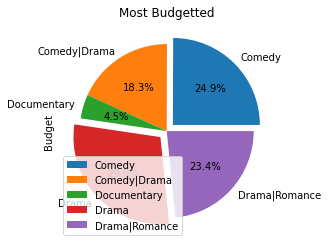

In [43]:
new_t.groupby('genres')['budget'].max().plot(kind='pie',legend=True,title='Most Budgetted',explode=(0.1,0,0,0.1,0), label='Budget',autopct='%1.1f%%');

Observation: **Drama** was the highest budgeted for(130000000) which is 29% of the distribution followed by **Comedy**(112000000) with 24.8% distribution.

A close look  at the charts and observations of Revenue and Budget with respect to genres;
Ideally, the higher the budget the more the revenue generated but this is not completely true so for this dataset as we can see that **Drama  and Drama|Romance** generated more revenue while **Drama and Comedy** cost more.

This will now bring us to checking for the relationship between **Revenue** and **Budget**

### Check :The relationship between *Revenue and Budget* 

In [ ]:
# Let's create a function to give multiple plots
def curve(x,y,xlabel,ylabel,t,kind,fig=(10,10)):
    plt.figure(figsize=fig)
    kind(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(t)
    plt.show()

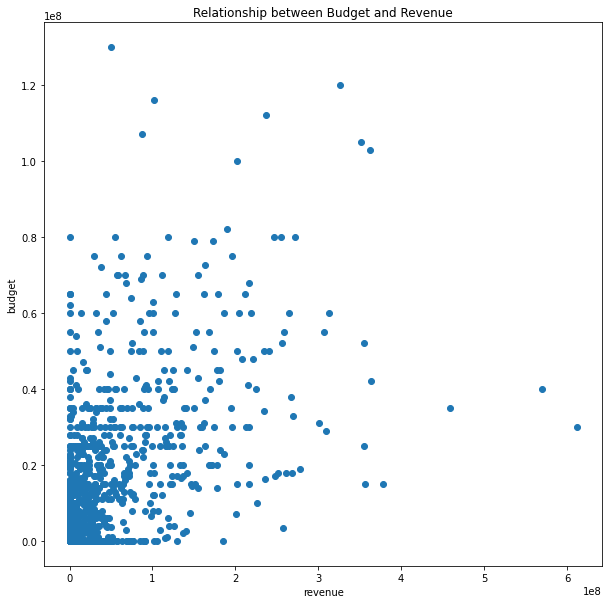

In [105]:
#lets see what the scatter plot of budget vs revenue look like
curve(new_t['revenue'],new_t['budget'],'revenue','budget','Relationship between Budget and Revenue',plt.scatter)


In [103]:
# Let use describe() to get the min,25%,50%,75% and max of the revenue
new_t['revenue'].describe()



count    2.305000e+03
mean     2.064485e+07
std      5.282069e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.134102e+07
max      6.118994e+08
Name: revenue, dtype: float64

In [104]:
# Let use describe() to get the min,25%,50%,75% and max of the budget
new_t['budget'].describe()

count    2.305000e+03
mean     7.531983e+06
std      1.555350e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+06
max      1.300000e+08
Name: budget, dtype: float64

In [91]:
# Let's create a dataframe from these value so as to plot a graph
table={'revenue':[0,0,0,0.21,6],'budget':[0,0,0,0.12,1]}
rb_t=pd.DataFrame(table)
rb_t


,revenue,budget
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.21,0.12
4,6.00,1.00


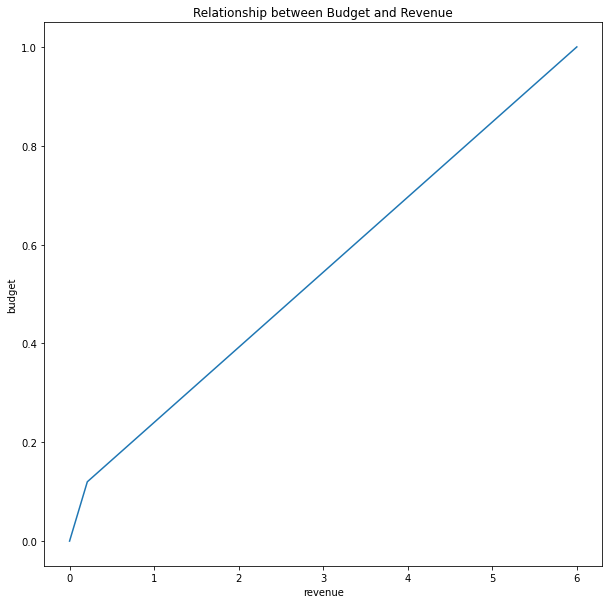

In [106]:
#let's plot a straight line graph to see the relationship between budget and revenue
curve(rb_t['revenue'],rb_t['budget'],'revenue','budget','Relationship between Budget and Revenue',plt.plot)

From the scatter plot we see a little correlations between _revenue and budget_ while in the  line graph we see  a linear correlation at the end point.

<a id='conclusions'></a>
## Conclusions

> From the analysis so far,
1. Comedy and Drama is the most occuring genre in the data set,
2. Drama is the most popular,generate more income and is the most budgeted for,
3. There is a a correlation between revenue and budget as seen in the scatter plot and line graph.


## Recommendation to a start up firm.

From the analysis performed, I will recommend to a movie start up firm comtemplating on which type of genre that will make them popular as well as generate good income to start with **Drama**.



## Limitations of this Analysis.
1. Only the the top five genres based of number of occurance in this dataset were analysed,
2. Most the the data points analyzed fall in the 75-100 percentile range.

## Future Analysis.
1. should look for the movie ID with the highest  revenue,budget and popularity to study its features.
2. should look for the relationship between revenue,popularity and runtime to see if runtime is a key factor.



## References.
> https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e
>https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=It%20can%20be%20useful%20for,for%20deletion%20from%20the%20data.
>https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=It%20can%20be%20useful%20for,for%20deletion%20from%20the%20data.
>https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
>https://realpython.com/pandas-groupby/
>https://dataindependent.com/pandas/type-error-pandas-missing-argument-how-to-fix/
>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
>https://scottc130.medium.com/using-functions-to-avoid-code-repetition-1fe4beff6d4d



In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1